# Optimización de carteras de inversión

Continuando con la línea de investigación en la optimización de carteras, en este notebook exploraremos el uso de redes neuronales de tipo **Transformer**, comparándolas con las **LSTM** (Long Short-Term Memory) como herramientas para mejorar la predicción del rendimiento de los activos financieros. Mientras que las LSTM son especialmente efectivas para capturar dependencias a largo plazo en secuencias de datos, los Transformers destacan por su capacidad para manejar relaciones más complejas en los datos y procesar secuencias de manera más eficiente. A través de esta comparación, buscamos evaluar cuál de estos enfoques es más efectivo para analizar patrones temporales en los precios de activos financieros y proporcionar un enfoque aún más robusto que complemente la **Teoría Moderna de la Cartera**.

## Funcionamiento Básico de los Transformers

Los Transformers son una arquitectura de redes neuronales que resuelven algunas de las limitaciones de las LSTM y otras redes recurrentes (RNN), particularmente en el **manejo de dependencias a largo plazo**. A diferencia de las LSTM, los Transformers no procesan secuencias de datos de forma secuencial, sino que utilizan **mecanismos de atención** para capturar las relaciones entre diferentes posiciones de la secuencia de manera más eficiente. Esta estructura permite que los Transformers modelen dependencias complejas.

Los componentes principales de un Transformer son:

1.	**Self-Attention (Auto-Atención)**:

* En lugar de procesar datos secuenciales, los Transformers utilizan el mecanismo de self-attention para determinar qué partes de la secuencia deben prestar más atención a otras partes.

* La auto-atención permite que el modelo considere todo el contexto de la secuencia al predecir una salida para cada paso. Por ejemplo, al predecir el precio de un activo en un día determinado, el modelo puede considerar información de cualquier otro día en la secuencia, sin tener que procesar los datos de manera secuencial.

* El proceso de self-attention se basa en la creación de tres matrices a partir de la entrada:

    *  Query (Consulta) ($Q$): Representa lo que la red está buscando en otras partes de la secuencia.
    * Key (Clave) ($K$): Representa las características de cada elemento en la secuencia.
    * Value (Valor) ($V$): Representa la información que se va a transferir entre los elementos de la secuencia.
    Luego, se calcula la importancia relativa de cada elemento de la secuencia con respecto a otros multiplicando $Q$ y $K$ y normalizando los resultados. Posteriormente, se multiplican por los valores ($V$) para generar la salida ponderada de la auto-atención.
    
2.	**Multi-Head Attention (Atención Multi-Cabeza)**:

* Los Transformers utilizan varias “cabezas” de atención (multiples instancias de self-attention) para permitir que el modelo considere diferentes relaciones en la secuencia desde varias perspectivas al mismo tiempo.

* Cada cabeza opera independientemente, aprendiendo diferentes aspectos de las dependencias entre las entradas, y luego los resultados se combinan para mejorar la representación final.

3.	**Feed-Forward Network (Red Neuronal de Propagación Directa)**:

* Después del mecanismo de atención, se utiliza una red neuronal densa para transformar la salida de la capa de atención. Esta red es aplicada a cada posición de la secuencia de forma independiente y de manera idéntica.

* La red neuronal consiste en una capa completamente conectada seguida de una activación no lineal (generalmente ReLU).

4.	**Positional Encoding (Codificación Posicional)**:

* Dado que los Transformers no procesan secuencias de manera secuencial, necesitan algún mecanismo para capturar el orden de los elementos en la secuencia. Esto se logra mediante positional encoding, que agrega una información basada en la posición de cada elemento en la secuencia.

* El positional encoding es una combinación de funciones seno y coseno que codifica la posición de los datos, permitiendo que el modelo sepa qué datos están antes o después en la secuencia.

5.	**Residual Connections (Conexiones Residuales) y Layer Normalization**:

* Para mejorar la capacidad de aprendizaje y evitar la degradación del gradiente, cada capa de atención y red neuronal en los Transformers incluye conexiones residuales que permiten que el modelo “salte” ciertas capas si es necesario, mejorando la estabilidad del entrenamiento.

* Layer normalization se utiliza para normalizar las entradas de cada capa, lo que estabiliza y acelera el proceso de entrenamiento.

Los Transformers son más eficientes que las LSTM, especialmente cuando se trabaja con grandes conjuntos de datos. Además, el mecanismo de atención ayuda a los Transformers a manejar dependencias a largo plazo y a aprender relaciones complejas dentro de los datos, lo que les da una ventaja significativa en tareas como la predicción de precios de activos financieros.

## Manejo del flujo de datos en Transformers

Veamos cómo sería el flujo de datos desde el input hasta la generación del output en un Transformer.

1.	**Input**: Secuencia de datos, por ejemplo, una serie temporal de precios de activos financieros.

2.	**Embedding**: Convertir cada precio en un vector de mayor dimensión para capturar mejor la información. Los Transformers no trabajan directamente con valores numéricos crudos, sino que convierten estos datos en representaciones de mayor dimensión mediante una capa de embedding o una capa densa.

3.	**Positional Encoding**: Añadir información de posición a cada vector. Dado que los Transformers no procesan los datos en un orden secuencial natural (como lo hacen las LSTM), necesitan saber en qué posición de la secuencia está cada elemento. El positional encoding se suma a los vectores de embedding para que el modelo entienda el orden de los datos.

4.	**Self-Attention**: El modelo aprende qué días de la secuencia son más relevantes para predecir el precio futuro. Aquí ocurre la magia de los Transformers. El mecanismo de self-attention permite que cada elemento de la secuencia preste atención a todos los demás elementos de la misma secuencia.

    * El modelo calcula la similitud entre las queries y las keys para determinar qué tanto debe “atender” a cada otro elemento. Los valores V correspondientes a las posiciones más relevantes reciben más peso en la salida.
    * Resultado: Cada posición de la secuencia se convierte en una combinación ponderada de todos los elementos de la secuencia, basándose en qué tan relevantes son entre sí.

5.	**Multi-Head Attention**: El self-attention se repite múltiples veces en cabezas paralelas. Cada cabeza de atención aprende diferentes patrones o relaciones entre los elementos de la secuencia. Después, las salidas de todas las cabezas se combinan para mejorar la representación del input.

6. **Feed-Forward**: Pasar cada vector por una red neuronal. Esta red transforma aún más los datos y ayuda a aprender patrones no lineales más complejos.

7. **Residual Connections y Layer Normalization (Conexiones Residuales y Normalización de Capas)**: Para mejorar el entrenamiento, se añaden conexiones residuales a las capas de atención y de propagación directa. Esto permite que la red salte algunas capas si es necesario y mejora la capacidad de aprendizaje. Layer normalization asegura que las distribuciones de activación estén bien controladas, lo que estabiliza y acelera el proceso de entrenamiento.

6.	**Stacking**: Repetir este proceso varias veces con varias capas de Transformer.

7.	**Output**: La salida pasa a una capa de salida. Si el objetivo es hacer una predicción, como predecir el próximo precio en una serie temporal, la capa de salida transformará los datos en la predicción final.

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/8/8f/The-Transformer-model-architecture.png" alt="Transformer Model Architecture" width="500"/>
</p>

*Image by [Vaswani et al.](https://commons.wikimedia.org/wiki/File:The-Transformer-model-architecture.png) licensed under [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en).*

## Composición de la cartera

En este notebook utilizaremos las mismas carteras y periodos que en el análisis anterior. Sin embargo, dado que los modelos basados en Transformers requieren grandes cantidades de datos para aprender patrones complejos, hemos concluido que el periodo elegido inicialmente no es suficiente. Esto se ha observado tras realizar varias pruebas incrementando la complejidad del modelo sin obtener mejoras significativas en los resultados, los cuales quedaron por debajo de los alcanzados con las LSTM.

Para abordar esta limitación, ampliaremos el rango temporal de los datos y utilizaremos información desde 1990. Esto presenta un nuevo desafío: algunos tickers comenzaron a cotizar en bolsa en fechas posteriores. En lugar de eliminarlos, lo que alteraría la composición de las carteras, vamos a imputar los valores faltantes mediante la media de los tickers que sí cotizaban ese día. Esta es una solución simple y podría introducir sesgos en el modelo, pero permite preservar la tendencia general del mercado en los datos históricos.

In [1]:
import yfinance as yf
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Add, Dropout, GlobalAveragePooling1D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from transformers import get_cosine_schedule_with_warmup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio
pio.renderers.default = 'notebook'

In [ ]:
def process_stock_data(tickers, start_date, end_date):

    data = yf.download(tickers, start=start_date, end=end_date)['Close']

    # Rellenar con la media de los tickers disponibles antes de la primera IPO
    def fill_with_mean_before_ipo(row):
        return row.fillna(row.mean())

    data_filled = data.apply(fill_with_mean_before_ipo, axis=1)

    return data_filled

large_cap = ["MSFT", "AAPL", "NVDA", "AMZN", "META", "GOOGL", "LLY", "AVGO", "JPM", "TSLA", "WMT", "XOM", "MA", "V", "UNH"]
mid_cap = ["ADSK", "AIG", "AJG", "APD", "DHI", "FTNT", "GM", "GWW", "MET", "MMM", "ODFL", "PSA", "TFC", "TRV", "WELL"]
small_cap = ["AAL", "MTCH", "MKTX", "PNW", "FRT", "CHRW", "GNRC", "BWA", "RHI", "HAS", "MHK", "RL", "BIO", "FMC", "IVZ"]

start_date = '1990-01-01'
end_date = '2023-12-29'

data_lc = process_stock_data(large_cap, start_date, end_date)
data_mc = process_stock_data(mid_cap, start_date, end_date)
data_sc = process_stock_data(small_cap, start_date, end_date)

## Preparación de los datos

En el siguiente paso dividimos el conjunto de datos las tres partes correspondientes al entrenamiento, validación y prueba. También normalizaremos los datos con MinMaxScaler. Finalemtne, como el modelo está diseñado para trabajar con datos secuenciales, es necesario estructurar los datos en secuencias. Teneindo en cuneta que nuestro horizonte de inversión es el conjunto de prueba y que abarca aproximadamente 2 años y 3 meses y queremos equilibrar algo entre el corto y mediano plazo, el periodo elegido es de 120 días. Además, para maximizar el Ratio de Sharpe, es importante considerar ciclos más largos que cubran la volatilidad, rendimientos y reversiones a la media. Otras opciones podrían ser:

* 60 días: Para captar movimientos de corto a mediano plazo y ajustar la cartera con más frecuencia.
* 90 días: Útil para capturar movimientos trimestrales y patrones que se alinean con reportes financieros, lo cual es importante en los mercados.
* 120 días: Permite captar patrones de largo plazo sin sobrecargar el modelo con ruido a corto plazo.
* 180 días: Para capturar tendencias más a largo plazo y hacer ajustes menos frecuentes en la cartera.

In [3]:
# Normalizar y crear secuencias
def normalize_and_create_sequences(data, sequence_length):
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = scaler.fit_transform(data.values)

    sequences, targets = [], []
    for i in range(len(normalized_data) - sequence_length):
        sequences.append(normalized_data[i:i + sequence_length])
        targets.append(normalized_data[i + sequence_length])

    return np.array(sequences), np.array(targets), scaler

sequence_length = 120

# Separar los datos en entrenamiento, validación y prueba
train_data_lc = data_lc.loc['1990-01-01':'2017-09-10']
val_data_lc = data_lc.loc['2017-09-10':'2020-03-20']
test_data_lc = data_lc.loc['2020-03-20':'2023-12-31']

train_data_mc = data_mc.loc['1990-01-01':'2017-09-10']
val_data_mc = data_mc.loc['2017-09-10':'2020-03-20']
test_data_mc = data_mc.loc['2020-03-20':'2023-12-31']

train_data_sc = data_sc.loc['1990-01-01':'2017-09-10']
val_data_sc = data_sc.loc['2017-09-10':'2020-03-20']
test_data_sc = data_sc.loc['2020-03-20':'2023-12-31']

# Crear secuencias para cada cartera
X_train_lc, y_train_lc, scaler_lc = normalize_and_create_sequences(train_data_lc, sequence_length)
X_val_lc, y_val_lc, _ = normalize_and_create_sequences(val_data_lc, sequence_length)
X_test_lc, y_test_lc, _ = normalize_and_create_sequences(test_data_lc, sequence_length)

X_train_mc, y_train_mc, scaler_mc = normalize_and_create_sequences(train_data_mc, sequence_length)
X_val_mc, y_val_mc, _ = normalize_and_create_sequences(val_data_mc, sequence_length)
X_test_mc, y_test_mc, _ = normalize_and_create_sequences(test_data_mc, sequence_length)

X_train_sc, y_train_sc, scaler_sc = normalize_and_create_sequences(train_data_sc, sequence_length)
X_val_sc, y_val_sc, _ = normalize_and_create_sequences(val_data_sc, sequence_length)
X_test_sc, y_test_sc, _ = normalize_and_create_sequences(test_data_sc, sequence_length)


## Configuración y entrenamiento

* Dado que los Transformers no procesan los datos de manera secuencial como las LSTM, utilizamos una **codificación posicional**. Esto nos permite integrar información sobre la posición temporal de cada dato en la secuencia (crucial para analizar series temporales como precios de activos financieros). La codificación posicional usa funciones seno y coseno para representar las posiciones en la secuencia, lo que ayuda al modelo a identificar la relación temporal entre los datos.

* El modelo incluye varias **capas de atención multi-cabeza**. Cada capa realiza varias operaciones de atención paralelas (en este caso, 8), lo que le permitirá aprender 8 relaciones diferentes en la secuencia de datos. Al tener múltiples cabezas de atención, el modelo es capaz de identificar patrones más complejos que una sola operación de atención.

* Para evitar que el modelo se ajuste demasiado a los datos de entrenamiento (sobreajuste), hemos implementado **regularización L2 y dropout**. La regularización L2 penaliza los pesos demasiado grandes en el modelo, mientras que el dropout apaga neuronas de forma aleatoria durante el entrenamiento, lo que hace que el modelo generalice mejor.

* El uso de **Batch Normalization y Layer Normalization** asegura que el proceso de entrenamiento sea más estable. Estas técnicas normalizan las activaciones del modelo, ajustando los valores para que estén en un rango óptimo, lo que ayuda a que el modelo aprenda de manera más eficiente y converja más rápidamente. Hacen que el entrenamiento sea menos propenso a problemas como explosiones o desvanecimiento de gradientes.

* Se ha implementado una **red feed-forward** profunda que utiliza varias capas densas (fully connected) entre las capas de atención. Permite aprender representaciones no lineales complejas de los datos, mejorando su capacidad para hacer predicciones más precisas.

* Añadimo también **ReduceLROnPlateau** que reduce la tasa de aprendizaje automáticamente si el rendimiento del modelo en el conjunto de validación deja de mejorar, y **EarlyStopping**,que detiene el entrenamiento si el rendimiento en validación no mejora después de un número determinado de épocas (lo que evita el sobreentrenamiento).

* En cuanto a la configuración del modelo, usamos un **tamaño de capa** de 128 para la proyección dimensional. Esto significa que cada posición en la secuencia está representada por un vector de 128 dimensiones, lo que permite que el modelo aprenda representaciones complejas sin sobrecargarlo con demasiada profundidad. El balance entre el número de capas, el número de cabezas de atención y el tamaño de capa ha sido ajustado para asegurar que el modelo tenga suficiente capacidad de aprendizaje sin introducir un exceso de complejidad ni sobreajuste.

In [ ]:
# Función para la codificación posicional
def positional_encoding(seq_len, d_model):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    pos_encoding = pos * angle_rates
    pos_encoding[:, 0::2] = np.sin(pos_encoding[:, 0::2])  # Sinusoide para posiciones pares
    pos_encoding[:, 1::2] = np.cos(pos_encoding[:, 1::2])  # Cosenoide para posiciones impares
    return pos_encoding

# Crear la arquitectura de Transformer
def create_transformer_model(input_shape, d_model=128, num_heads=8, ff_dim=256, num_layers=3, dropout_rate=0.3, l2_reg=0.001):
    inputs = Input(shape=input_shape)

    # Capa densa con regularización L2
    x = Dense(d_model, kernel_regularizer=l2(l2_reg))(inputs)

    # Codificación posicional
    pos_enc = positional_encoding(input_shape[0], d_model)
    x = x + pos_enc

    for _ in range(num_layers):
        # Multi-Head Attention
        attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)

        # Add, Normalize & Dropout
        attn_output = Dropout(dropout_rate)(attn_output)
        attn_output = LayerNormalization(epsilon=1e-6)(Add()([x, attn_output]))

        # Feed-Forward Network con regularización L2 y Batch Normalization
        ffn_output = Dense(ff_dim, activation='relu', kernel_regularizer=l2(l2_reg))(attn_output)
        ffn_output = Dense(d_model, kernel_regularizer=l2(l2_reg))(ffn_output)
        ffn_output = BatchNormalization()(ffn_output)  # Añadir Batch Normalization

        # Add, Normalize & Dropout again
        ffn_output = Dropout(dropout_rate)(ffn_output)
        x = LayerNormalization(epsilon=1e-6)(Add()([attn_output, ffn_output]))

    # Pooling global para reducir la dimensionalidad de los datos de manera efectiva
    x = GlobalAveragePooling1D()(x)

    # Capa de salida
    outputs = Dense(units=15)(x)

    # Definir el modelo
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')

    return model

def create_and_train_transformer_model(X_train, y_train, X_val, y_val, d_model=128):
    model = create_transformer_model(input_shape=(X_train.shape[1], X_train.shape[2]), d_model=d_model)

    # Early stopping y reducción de tasa de aprendizaje si la validación deja de mejorar
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=32,
                        verbose=1, callbacks=[early_stopping, lr_scheduler])

    return model, history

model_lc, history_lc = create_and_train_transformer_model(X_train_lc, y_train_lc, X_val_lc, y_val_lc, d_model=128)
model_mc, history_mc = create_and_train_transformer_model(X_train_mc, y_train_mc, X_val_mc, y_val_mc, d_model=128)
model_sc, history_sc = create_and_train_transformer_model(X_train_sc, y_train_sc, X_val_sc, y_val_sc, d_model=128)

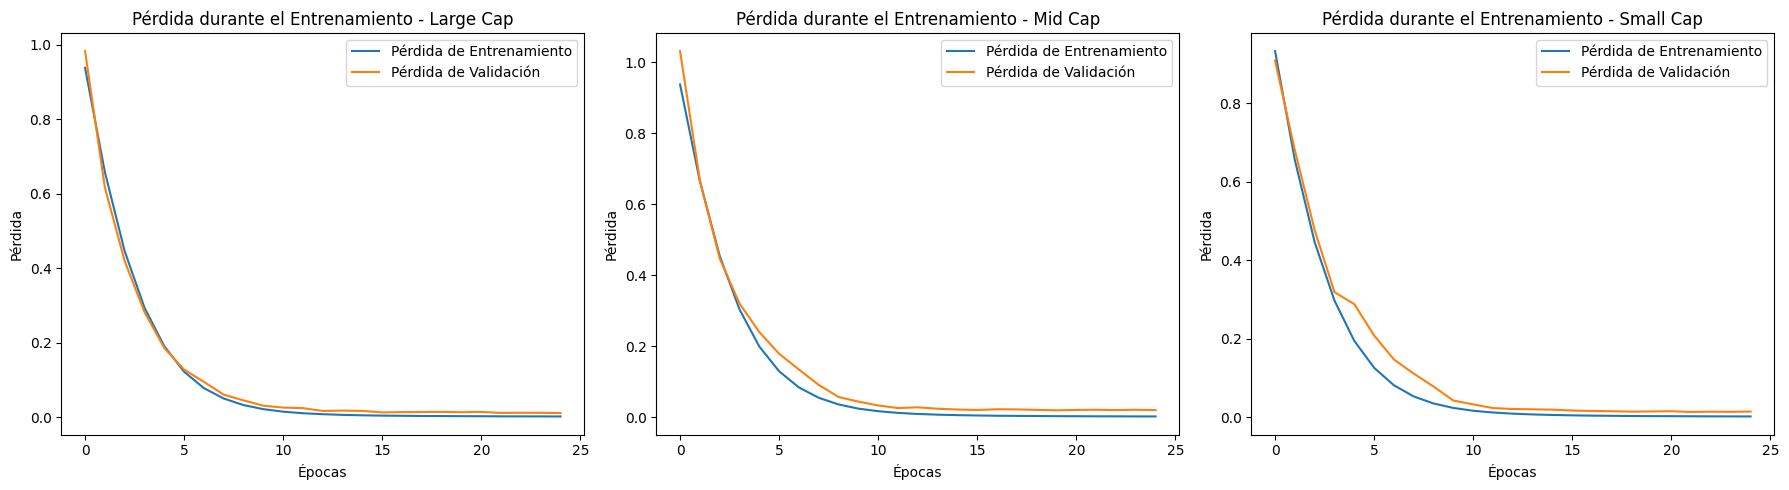

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].plot(history_lc.history['loss'], label='Pérdida de Entrenamiento')
axs[0].plot(history_lc.history['val_loss'], label='Pérdida de Validación')
axs[0].set_title('Pérdida durante el Entrenamiento - Large Cap')
axs[0].set_xlabel('Épocas')
axs[0].set_ylabel('Pérdida')
axs[0].legend()

axs[1].plot(history_mc.history['loss'], label='Pérdida de Entrenamiento')
axs[1].plot(history_mc.history['val_loss'], label='Pérdida de Validación')
axs[1].set_title('Pérdida durante el Entrenamiento - Mid Cap')
axs[1].set_xlabel('Épocas')
axs[1].set_ylabel('Pérdida')
axs[1].legend()

axs[2].plot(history_sc.history['loss'], label='Pérdida de Entrenamiento')
axs[2].plot(history_sc.history['val_loss'], label='Pérdida de Validación')
axs[2].set_title('Pérdida durante el Entrenamiento - Small Cap')
axs[2].set_xlabel('Épocas')
axs[2].set_ylabel('Pérdida')
axs[2].legend()

plt.tight_layout()
plt.show()

## Predicción conjunto de prueba

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step


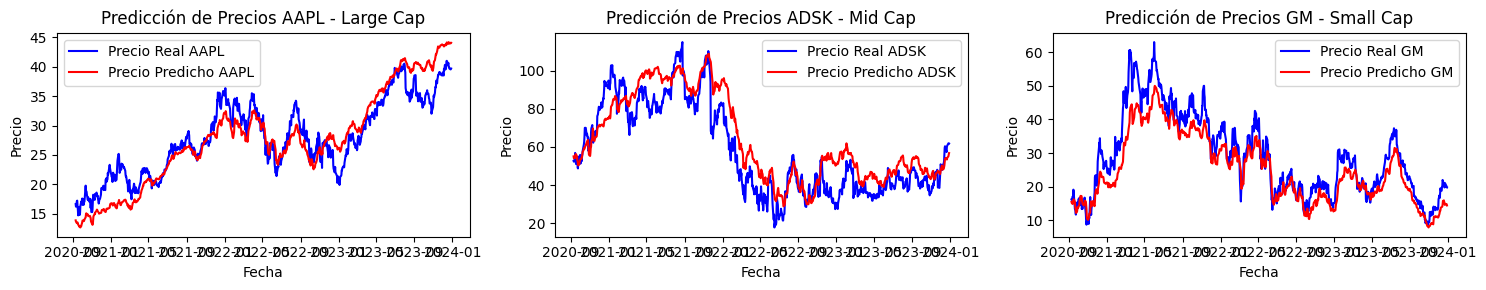

In [6]:
# Cogemos las fechas de X_test para asegurarnos que son las que hemos definido
n_samples = X_test_lc.shape[0]
start_index = len(data_lc) - n_samples
dates_test = data_lc.index[start_index:]

ticker_index = 0

# Para Large Cap
predicted_prices_lc = model_lc.predict(X_test_lc)
predicted_prices_rescaled_lc = scaler_lc.inverse_transform(predicted_prices_lc)[:, ticker_index]
actual_prices_rescaled_lc = scaler_lc.inverse_transform(y_test_lc)[:, ticker_index]

# Para Mid Cap
predicted_prices_mc = model_mc.predict(X_test_mc)
predicted_prices_rescaled_mc = scaler_mc.inverse_transform(predicted_prices_mc)[:, ticker_index]
actual_prices_rescaled_mc = scaler_mc.inverse_transform(y_test_mc)[:, ticker_index]

# Para Small Cap
predicted_prices_sc = model_sc.predict(X_test_sc)
predicted_prices_rescaled_sc = scaler_sc.inverse_transform(predicted_prices_sc)[:, ticker_index]
actual_prices_rescaled_sc = scaler_sc.inverse_transform(y_test_sc)[:, ticker_index]

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].plot(dates_test, actual_prices_rescaled_lc, color='blue', label='Precio Real AAPL')
axs[0].plot(dates_test, predicted_prices_rescaled_lc, color='red', label='Precio Predicho AAPL')
axs[0].set_title('Predicción de Precios AAPL - Large Cap')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Precio')
axs[0].legend()

axs[1].plot(dates_test, actual_prices_rescaled_mc, color='blue', label='Precio Real ADSK')
axs[1].plot(dates_test, predicted_prices_rescaled_mc, color='red', label='Precio Predicho ADSK')
axs[1].set_title('Predicción de Precios ADSK - Mid Cap')
axs[1].set_xlabel('Fecha')
axs[1].set_ylabel('Precio')
axs[1].legend()

axs[2].plot(dates_test, actual_prices_rescaled_sc, color='blue', label='Precio Real GM')
axs[2].plot(dates_test, predicted_prices_rescaled_sc, color='red', label='Precio Predicho GM')
axs[2].set_title('Predicción de Precios GM - Small Cap')
axs[2].set_xlabel('Fecha')
axs[2].set_ylabel('Precio')
axs[2].legend()

plt.tight_layout()
plt.show()

## Optimización Máximo Ratio de Sharpe - Transfomers


In [ ]:
# Función para calcular el ratio de Sharpe
def sharpe_ratio(weights, returns, risk_free_rate=0.000128):
    portfolio_return = np.sum(weights * np.mean(returns, axis=0))
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights)))
    return -(portfolio_return - risk_free_rate) / portfolio_std  # Minimizar la negación del ratio de Sharpe

# Función para optimizar los pesos de la cartera
def optimize_portfolio(predicted_prices_rescaled):

    predicted_returns = np.diff(predicted_prices_rescaled, axis=0) / predicted_prices_rescaled[:-1]

    num_assets = predicted_returns.shape[1]
    initial_weights = num_assets * [1. / num_assets]  # Pesos iniciales iguales
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Los pesos deben sumar 1
    bounds = tuple((0, 1) for asset in range(num_assets))  # Pesos entre 0 y 1
    optimized = minimize(sharpe_ratio, initial_weights, args=(predicted_returns,),
                         method='SLSQP', bounds=bounds, constraints=constraints)

    return optimized.x

predicted_prices_lc = model_lc.predict(X_test_lc)
predicted_prices_rescaled_lc = scaler_lc.inverse_transform(predicted_prices_lc)
optimal_weights_lc = optimize_portfolio(predicted_prices_rescaled_lc)

predicted_prices_mc = model_mc.predict(X_test_mc)
predicted_prices_rescaled_mc = scaler_mc.inverse_transform(predicted_prices_mc)
optimal_weights_mc = optimize_portfolio(predicted_prices_rescaled_mc)

predicted_prices_sc = model_sc.predict(X_test_sc)
predicted_prices_rescaled_sc = scaler_sc.inverse_transform(predicted_prices_sc)
optimal_weights_sc = optimize_portfolio(predicted_prices_rescaled_sc)

In [ ]:
# Filtrar los activos con pesos insignificantes
def filter_small_weights(tickers, weights, threshold=0.0001):
    filtered_tickers = []
    filtered_weights = []
    for ticker, weight in zip(tickers, weights):
        if weight > threshold:
            filtered_tickers.append(ticker)
            filtered_weights.append(weight)
    return filtered_tickers, filtered_weights

tickers_lc_filtered, weights_lc_filtered = filter_small_weights(large_cap, optimal_weights_lc)
tickers_mc_filtered, weights_mc_filtered = filter_small_weights(mid_cap, optimal_weights_mc)
tickers_sc_filtered, weights_sc_filtered = filter_small_weights(small_cap, optimal_weights_sc)

fig = make_subplots(rows=1, cols=3, subplot_titles=("Large Cap", "Mid Cap", "Small Cap"), specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]])


fig.add_trace(go.Pie(labels=tickers_lc_filtered, values=weights_lc_filtered, name="Large Cap",
                     textinfo='percent+label'),
              row=1, col=1)

fig.add_trace(go.Pie(labels=tickers_mc_filtered, values=weights_mc_filtered, name="Mid Cap",
                     textinfo='percent+label'),
              row=1, col=2)

fig.add_trace(go.Pie(labels=tickers_sc_filtered, values=weights_sc_filtered, name="Small Cap",
                     textinfo='percent+label'),
              row=1, col=3)


fig.update_layout(
    title_text="Distribución de Pesos Óptimos en las Carteras",
    title_x=0.5,
    title_font_size=20,
    margin=dict(t=100, b=100, l=50, r=50),
    showlegend=False
)

fig.show()

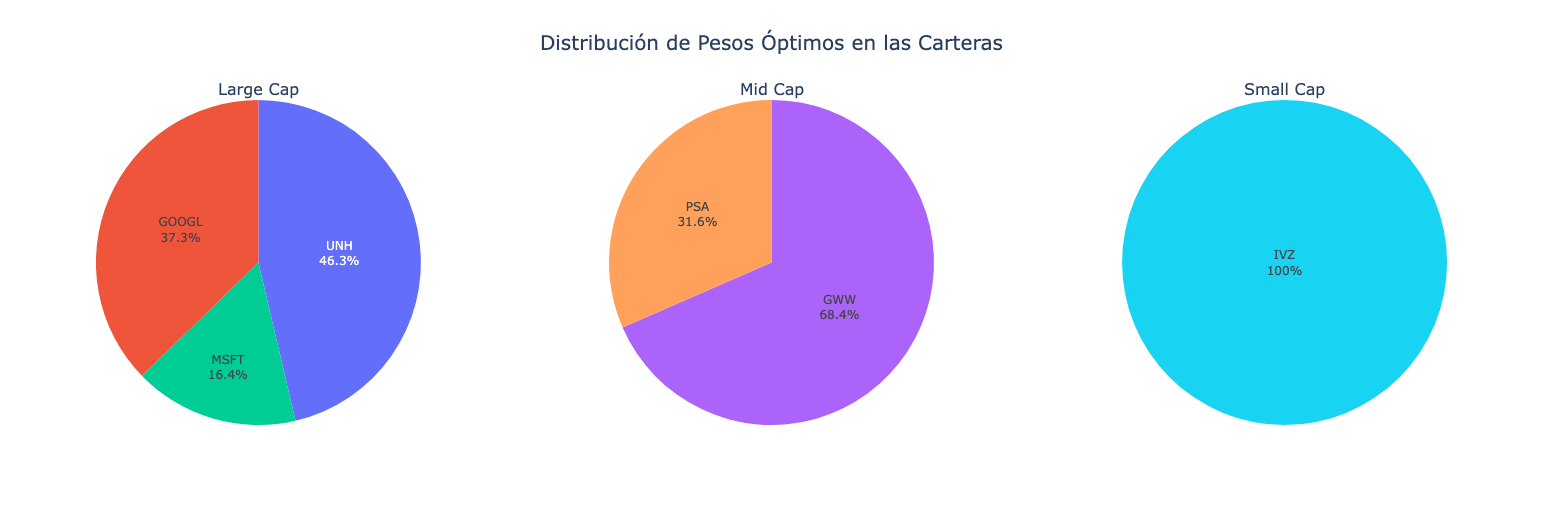

In [2]:
Image(filename='./images/10_trans.png')

En general, los gráficos muestran una fuerte concentración de pesos en ciertos activos dentro de cada cartera, esta concentración implica un mayor riesgo por falta de diversificación. Vamos a ver como serían los pesos sin usar el modelo de LSTM.

## Resultados

Cargamos los resultados anteriores para combinarlos con los nuevos que hemos obtenido.

In [14]:
df = pd.read_csv('./data/portfolio_results.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df

,Large Cap LSTM,Large Cap MPT,Mid Cap LSTM,Mid Cap MPT,Small Cap LSTM,Small Cap MPT
Date,,,,,,
2020-09-11 00:00:00+00:00,0.003922,-0.008321,-0.005111,0.003288,0.008608,-0.001511
2020-09-14 00:00:00+00:00,0.009845,0.036275,0.010127,0.002401,0.067276,0.020827
2020-09-15 00:00:00+00:00,0.004001,0.059559,0.011496,0.019467,0.067673,0.031234
2020-09-16 00:00:00+00:00,0.026715,0.035975,0.006417,-0.008039,0.076281,0.024379
2020-09-17 00:00:00+00:00,0.024075,0.018205,-0.003729,-0.011184,0.043041,0.005102
...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,1.920964,1.403302,1.671827,0.889309,0.926500,-0.342022
2023-12-26 00:00:00+00:00,1.932327,1.418462,1.688106,0.904197,0.932856,-0.336896
2023-12-27 00:00:00+00:00,1.938162,1.433847,1.677797,0.896668,0.928619,-0.329942


In [ ]:
# Función para descargar los datos y calcular los retornos acumulados para distintas fechas
def get_portfolio_returns(tickers, start_date, end_date, weights):
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    daily_returns = data.pct_change().dropna()
    portfolio_returns = daily_returns.dot(weights)
    cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1
    return cumulative_portfolio_returns

# Función para generar el gráfico de resultados
def plot_returns(fig, transformer_returns, lstm_returns, mpt_returns, sp500_returns, portfolio_name, row, show_legend):

    fig.add_trace(
        go.Scatter(x=transformer_returns.index, y=transformer_returns,
                   mode='lines', name=f'Transformer', line=dict(color='orange'), legendgroup='Transformer', showlegend=show_legend),
        row=row, col=1
    )

    fig.add_trace(
        go.Scatter(x=lstm_returns.index, y=lstm_returns,
                   mode='lines', name=f'LSTM', line=dict(color='blue'), legendgroup='LSTM', showlegend=show_legend),
        row=row, col=1
    )

    fig.add_trace(
        go.Scatter(x=mpt_returns.index, y=mpt_returns,
                   mode='lines', name=f'MPT', line=dict(color='green'), legendgroup='MPT', showlegend=show_legend),
        row=row, col=1
    )

    fig.add_trace(
        go.Scatter(x=sp500_returns.index, y=sp500_returns,
                   mode='lines', name='S&P 500', line=dict(dash='dash', color='red'), legendgroup='S&P 500', showlegend=show_legend),
        row=row, col=1
    )

portfolios = {
    'Large Cap': large_cap,
    'Mid Cap': mid_cap,
    'Small Cap': small_cap
}

# Pesos óptimos del Transformer
optimal_weights_transformer = {
    'Large Cap': optimal_weights_lc,
    'Mid Cap': optimal_weights_mc,
    'Small Cap': optimal_weights_sc
}

cumulative_lstm_returns = df[['Large Cap LSTM', 'Mid Cap LSTM', 'Small Cap LSTM']]
cumulative_mpt_returns = df[['Large Cap MPT', 'Mid Cap MPT', 'Small Cap MPT']]

def get_sp500_returns(start_date, end_date):
    sp500_data = yf.download("^GSPC", start=start_date, end=end_date)['Close']
    sp500_returns = sp500_data.pct_change().dropna()
    return (1 + sp500_returns).cumprod() - 1

sp500_returns = get_sp500_returns('2020-09-10', '2023-12-29')

fig = make_subplots(rows=3, cols=1, subplot_titles=["Large Cap", "Mid Cap", "Small Cap"])

results = pd.DataFrame()

for i, (portfolio_name, tickers) in enumerate(portfolios.items()):

    cumulative_transformer_returns = get_portfolio_returns(tickers, '2020-09-10', '2023-12-29', optimal_weights_transformer[portfolio_name])

    lstm_returns = cumulative_lstm_returns[f'{portfolio_name} LSTM']
    mpt_returns = cumulative_mpt_returns[f'{portfolio_name} MPT']

    portfolio_results = pd.DataFrame({
        f'Transformer': cumulative_transformer_returns,
        f'LSTM': lstm_returns,
        f'MPT': mpt_returns
    })

    results = pd.concat([results, portfolio_results], axis=1)

    plot_returns(
        fig,
        cumulative_transformer_returns,
        lstm_returns,
        mpt_returns,
        sp500_returns,
        portfolio_name,
        i+1,
        show_legend=(i == 0)
    )

fig.update_layout(
    title_text="Cumulative Returns - Transformer vs LSTM vs MPT vs S&P 500",
    height=900,
    showlegend=True
)
fig.show()


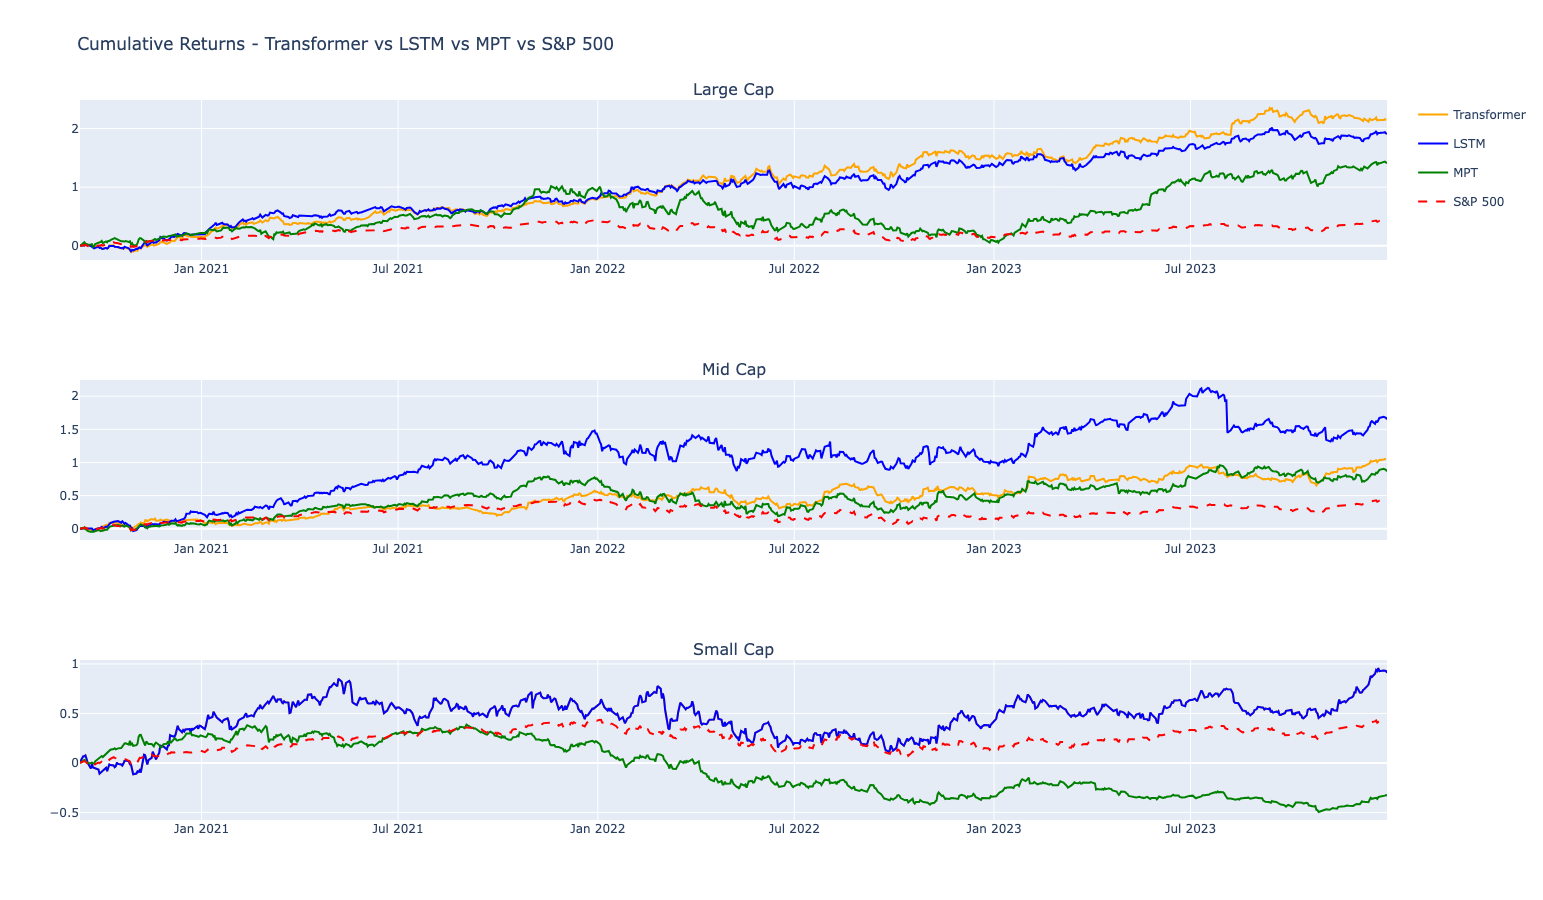

In [3]:
Image(filename='./images/11_trans.png')

In [ ]:
# Función para descargar los datos y calcular los retornos diarios
def get_daily_returns(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Close']
    daily_returns = data.pct_change().dropna()
    return daily_returns

# Función para calcular métricas de rendimiento del portafolio
def calculate_portfolio_metrics(daily_returns, weights, risk_free_rate=0.000128):
    mean_daily_return = daily_returns.mean()
    annualized_return = np.dot(mean_daily_return, weights) * 252
    annualized_volatility = np.sqrt(np.dot(weights.T, np.dot(daily_returns.cov() * 252, weights)))
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    return annualized_return, annualized_volatility, sharpe_ratio

# Función para calcular métricas del S&P 500
def calculate_sp500_metrics(start_date, end_date, risk_free_rate=0.000128):
    sp500_returns = get_daily_returns("^GSPC", start_date, end_date)
    mean_daily_return_sp500 = sp500_returns.mean()
    annualized_return_sp500 = mean_daily_return_sp500 * 252
    annualized_volatility_sp500 = sp500_returns.std() * np.sqrt(252)
    sharpe_ratio_sp500 = (annualized_return_sp500 - risk_free_rate) / annualized_volatility_sp500
    return annualized_return_sp500, annualized_volatility_sp500, sharpe_ratio_sp500

# Función completa para calcular métricas
def calculate_results_for_period(portfolios, optimal_weights, start_date, end_date, risk_free_rate=0.000128):

    results = []
    annualized_return_sp500, annualized_volatility_sp500, sharpe_ratio_sp500 = calculate_sp500_metrics(start_date, end_date, risk_free_rate)

    for portfolio_name, tickers in portfolios.items():
        daily_returns = get_daily_returns(tickers, start_date, end_date)
        weights = optimal_weights[portfolio_name]
        annualized_return_portfolio, annualized_volatility_portfolio, sharpe_ratio_portfolio = calculate_portfolio_metrics(daily_returns, weights, risk_free_rate)

        portfolio_result = {
            "Portfolio": portfolio_name,
            "Annualized Return": annualized_return_portfolio,
            "Annualized Volatility": annualized_volatility_portfolio,
            "Sharpe Ratio": sharpe_ratio_portfolio
        }
        results.append(portfolio_result)

    sp500_result = {
        "Portfolio": "S&P 500",
        "Annualized Return": annualized_return_sp500,
        "Annualized Volatility": annualized_volatility_sp500,
        "Sharpe Ratio": sharpe_ratio_sp500
    }
    results.append(sp500_result)

    results_df = pd.DataFrame(results)
    return results_df

portfolios2 = {
    'Large Cap - Transformer': large_cap,
    'Mid Cap - Transformer': mid_cap,
    'Small Cap - Transformer': small_cap
}

optimal_weights2 = {
    'Large Cap - Transformer': optimal_weights_lc,
    'Mid Cap - Transformer': optimal_weights_mc,
    'Small Cap - Transformer': optimal_weights_sc
}

results_df = calculate_results_for_period(portfolios2, optimal_weights2, '2020-09-10', '2023-12-31')

In [75]:
pd.options.display.float_format = "{:.2f}".format

results_lstm_mpt = pd.read_csv('results_anualized.csv')
df_combined = pd.concat([results_df, results_lstm_mpt], ignore_index=True)
df_combined = df_combined.drop('Unnamed: 0', axis=1)
df_combined

,Portfolio,Annualized Return,Annualized Volatility,Sharpe Ratio
0,Large Cap - Transformer,0.38,0.21,1.76
1,Mid Cap - Transformer,0.26,0.23,1.14
2,Small Cap - Transformer,0.27,0.39,0.69
3,S&P 500,0.12,0.18,0.70
4,Large Cap - LSTM,0.35,0.22,1.59
5,Mid Cap - LSTM,0.35,0.32,1.09
6,Small Cap - LSTM,0.27,0.39,0.69
7,Large Cap - MPT,0.32,0.33,0.97
8,Mid Cap - MPT,0.23,0.28,0.82
9,Small Cap - MPT,-0.08,0.30,-0.27


Los Transformers parecen tener un rendimiento robusto en términos de retornos ajustados al riesgo, especialmente en Large Cap y Mid Cap, lo que sugiere que este modelo capta mejor las relaciones complejas en estos segmentos. En cuanto a su desempeño en Small Cap no ofrece una mejora significativa frente a LSTM ya que la composición de la cartera es la misma. En comparación con MPT, tanto Transformers como LSTM ofrecen resultados mucho más sólidos, con ratios de Sharpe más altos y retornos superiores. Por lo tanto, los enfoques basados en redes neuronales, especialmente los Transformers, parecen ser una alternativa prometedora para la optimización de carteras.

----


## Validación adicional fuera de muestra manteniendo los pesos y reoptimización

In [54]:
results_df_new_weights = pd.read_csv("./data/results_df_new_weigths.csv")
new_portfolio_results = pd.read_csv("./data/new_portfolio_results.csv")

In [ ]:
new_test_data_lc = yf.download(large_cap, start='2023-12-29', end='2024-10-10')['Close']
new_test_data_mc = yf.download(mid_cap, start='2023-12-29', end='2024-10-10')['Close']
new_test_data_sc = yf.download(small_cap, start='2023-12-29', end='2024-10-10')['Close']

X_test_lc_new, y_test_lc_new, _ = normalize_and_create_sequences(new_test_data_lc, sequence_length)
X_test_mc_new, y_test_mc_new, _ = normalize_and_create_sequences(new_test_data_mc, sequence_length)
X_test_sc_new, y_test_sc_new, _ = normalize_and_create_sequences(new_test_data_sc, sequence_length)

predicted_prices_lc_new = model_lc.predict(X_test_lc_new)
predicted_prices_rescaled_lc_new = scaler_lc.inverse_transform(predicted_prices_lc_new)
optimal_weights_lc_new = optimize_portfolio(predicted_prices_rescaled_lc_new)

predicted_prices_mc_new = model_mc.predict(X_test_mc_new)
predicted_prices_rescaled_mc_new = scaler_mc.inverse_transform(predicted_prices_mc_new)
optimal_weights_mc_new = optimize_portfolio(predicted_prices_rescaled_mc_new)

predicted_prices_sc_new = model_sc.predict(X_test_sc_new)
predicted_prices_rescaled_sc_new = scaler_sc.inverse_transform(predicted_prices_sc_new)
optimal_weights_sc_new = optimize_portfolio(predicted_prices_rescaled_sc_new)

In [ ]:

portfolios = {
    'Large Cap': large_cap,
    'Mid Cap': mid_cap,
    'Small Cap': small_cap
}

new_optimal_weights_transformer = {
    'Large Cap': optimal_weights_lc_new,
    'Mid Cap': optimal_weights_mc_new,
    'Small Cap': optimal_weights_sc_new
}

sp500_returns = get_sp500_returns('2023-12-31', '2024-10-10')

fig = make_subplots(rows=3, cols=1, subplot_titles=["Large Cap", "Mid Cap", "Small Cap"])

for i, (portfolio_name, tickers) in enumerate(portfolios.items()):

    cumulative_transformer_returns = get_portfolio_returns(tickers, '2023-12-31', '2024-10-10', new_optimal_weights_transformer[portfolio_name])

    lstm_returns = new_portfolio_results[f'{portfolio_name} LSTM']
    mpt_returns = new_portfolio_results[f'{portfolio_name} MPT']

    fig.add_trace(go.Scatter(x=cumulative_transformer_returns.index, y=cumulative_transformer_returns,
                             mode='lines', name=f'Transformer', line=dict(color='orange')), row=i+1, col=1)

    fig.add_trace(go.Scatter(x=lstm_returns.index, y=lstm_returns,
                             mode='lines', name=f'LSTM', line=dict(color='blue')), row=i+1, col=1)

    fig.add_trace(go.Scatter(x=mpt_returns.index, y=mpt_returns,
                             mode='lines', name=f'MPT', line=dict(color='green')), row=i+1, col=1)

    fig.add_trace(go.Scatter(x=sp500_returns.index, y=sp500_returns,
                             mode='lines', name=f'S&P 500', line=dict(dash='dash', color='red')), row=i+1, col=1)

fig.update_layout(title_text="Cumulative Returns - Transformer, LSTM, MPT, S&P 500", height=900, showlegend=True)
fig.show()

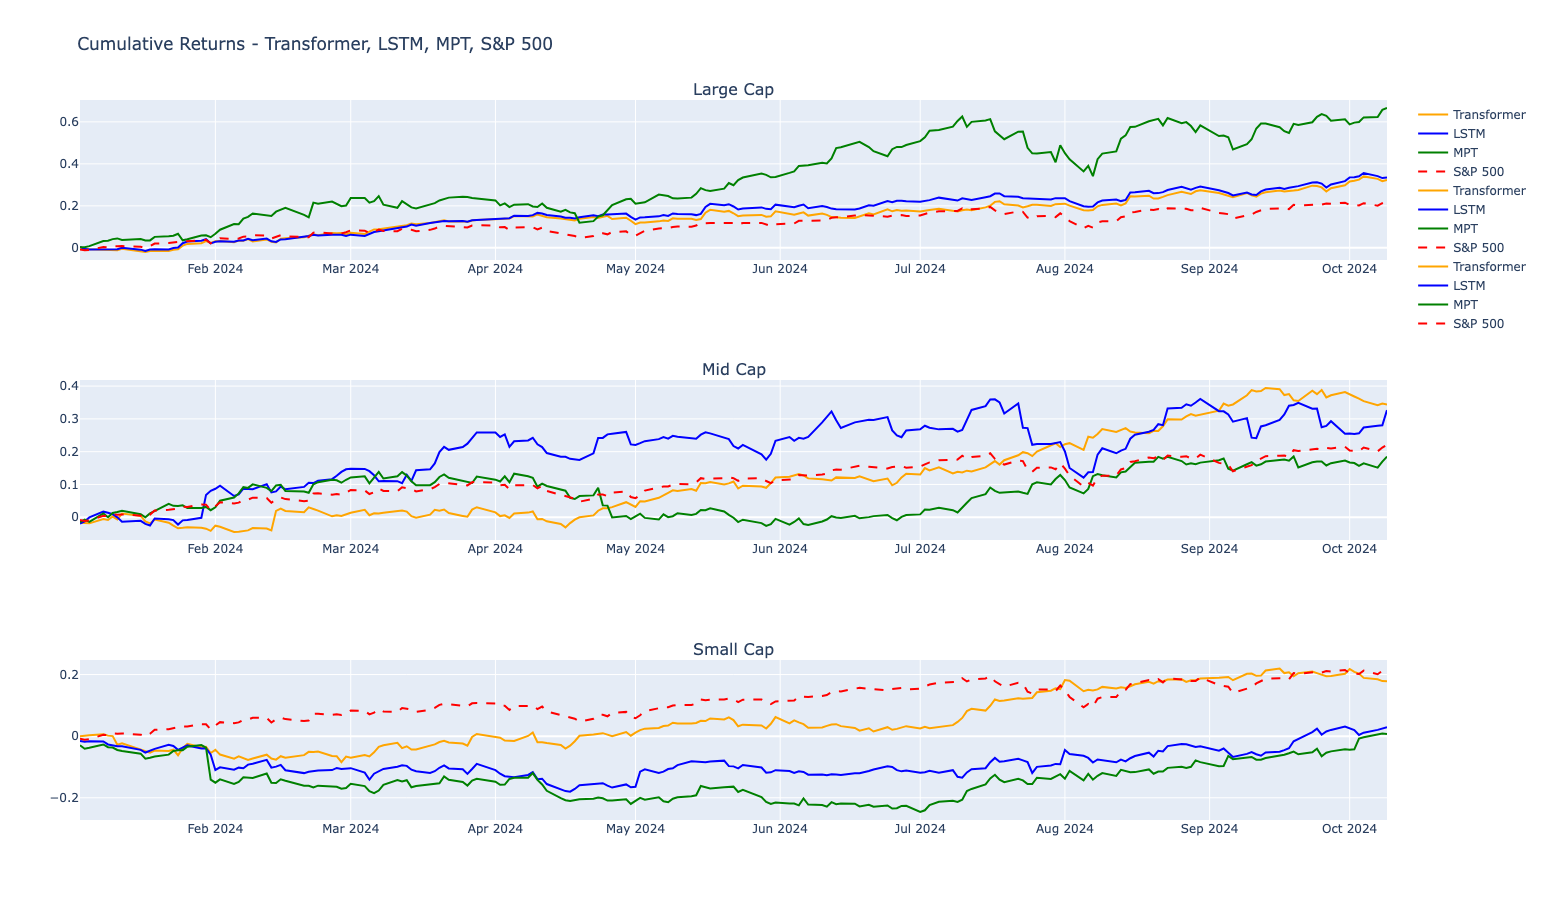

In [4]:
Image(filename='./images/12_trans.png')

In [ ]:
portfolios2 = {
    'Large Cap - Transformer': large_cap,
    'Mid Cap - Transformer': mid_cap,
    'Small Cap - Transformer': small_cap
}

optimal_weights3 = {
    'Large Cap - Transformer': optimal_weights_lc_new,
    'Mid Cap - Transformer': optimal_weights_mc_new,
    'Small Cap - Transformer': optimal_weights_sc_new
}

results_df = calculate_results_for_period(portfolios2, optimal_weights3, '2023-12-29', '2024-10-10')
results_df = results_df[results_df['Portfolio'] != 'S&P 500']

In [59]:
df_combined = pd.concat([results_df, results_df_new_weights], ignore_index=True)
df_combined = df_combined.drop('Unnamed: 0', axis=1)
df_combined

,Portfolio,Annualized Return,Annualized Volatility,Sharpe Ratio
0,Large Cap - Transformer,0.45,0.13,3.41
1,Mid Cap - Transformer,0.40,0.16,2.48
2,Small Cap - Transformer,0.27,0.17,1.55
3,Large Cap - LSTM,0.40,0.12,3.30
4,Mid Cap - LSTM,0.40,0.26,1.55
5,Small Cap - LSTM,0.05,0.20,0.24
6,Large Cap - MPT,0.70,0.27,2.55
7,Mid Cap - MPT,0.22,0.19,1.19
8,Small Cap - MPT,0.02,0.25,0.08
9,S&P 500,0.26,0.13,2.04


Las carteras optimizadas con Transformers han mostrado un desempeño sobresaliente, particularmente en Large y Mid Cap, superando tanto a las carteras optimizadas con LSTM como a las basadas en MPT, así como al benchmark del S&P 500. Esto refuerza el valor de aplicar modelos más complejos como los Transformers en la optimización de carteras. Aun así, las Small Caps son más difíciles de predecir y optimizar, posiblemente debido a su mayor volatilidad e imprevisibilidad en comparación con las carteras de empresas más grandes.